In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl



In [3]:
file = pd.read_excel("Carbon Pricing_Paper.xlsx", sheet_name="Sheet1")

In [4]:
# getting values
price_s100 = file.loc[file['Scenario'] == 'stick-100', 'Price'].values[0]
price_s80 = file.loc[file['Scenario'] == 'stick-80', 'Price'].values[0]
price_s60 = file.loc[file['Scenario'] == 'stick-60', 'Price'].values[0]

price_2030nl100 = file.loc[file['Scenario'] == '2030nl-100', 'Price'].values[0]
price_2040nl100 = file.loc[file['Scenario'] == '2040nl-100', 'Price'].values[0]
price_2030l100 = file.loc[file['Scenario'] == '2030l-100', 'Price'].values[0]
price_2040l100 = file.loc[file['Scenario'] == '2040l-100', 'Price'].values[0]

price_2030nl80 = file.loc[file['Scenario'] == '2030nl-80', 'Price'].values[0]
price_2040nl80 = file.loc[file['Scenario'] == '2040nl-80', 'Price'].values[0]
price_2030l80 = file.loc[file['Scenario'] == '2030l-80', 'Price'].values[0]
price_2040l80 = file.loc[file['Scenario'] == '2040l-80', 'Price'].values[0]

price_2030nl60 = file.loc[file['Scenario'] == '2030nl-60', 'Price'].values[0]
price_2040nl60 = file.loc[file['Scenario'] == '2040nl-60', 'Price'].values[0]
price_2030l60 = file.loc[file['Scenario'] == '2030l-60', 'Price'].values[0]
price_2040l60 = file.loc[file['Scenario'] == '2040l-60', 'Price'].values[0]

price_2030_nt = file.loc[file['Scenario'] == '2030nt-100', 'Price'].values[0]
price_2040_nt = file.loc[file['Scenario'] == '2040nt-100', 'Price'].values[0]
price_2030_et = file.loc[file['Scenario'] == '2030et-100', 'Price'].values[0]
price_2040_et = file.loc[file['Scenario'] == '2040et-100', 'Price'].values[0]



In [5]:
#find relative changes compared with stick-only
price_2030nl100 = (price_2030nl100/price_s100)-1
price_2040nl100 = (price_2040nl100/price_s100)-1
price_2030l100 = (price_2030l100/price_s100)-1
price_2040l100 = (price_2040l100/price_s100)-1

price_2030nl80 = (price_2030nl80/price_s80)-1
price_2040nl80 = (price_2040nl80/price_s80)-1
price_2030l80 = (price_2030l80/price_s80)-1
price_2040l80 = (price_2040l80/price_s80)-1

price_2030nl60 = (price_2030nl60/price_s60)-1
price_2040nl60 = (price_2040nl60/price_s60)-1
price_2030l60 = (price_2030l60/price_s60)-1
price_2040l60 = (price_2040l60/price_s60)-1


In [6]:
#checking data type
# type(price_s100)

In [7]:
# 自定义y轴格式化函数
def percent_formatter(x, pos):
    return f'{x*100:.0f}%'

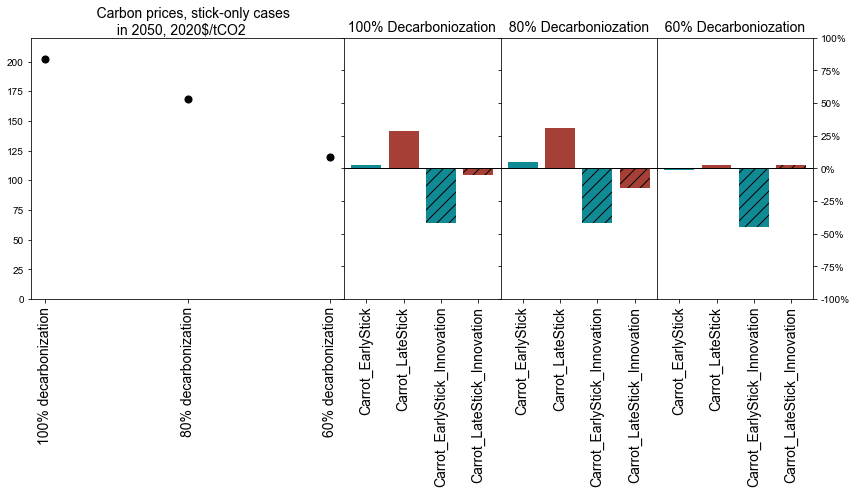

In [8]:
# 4-panel carbon price figure

# 设置全局字体为Arial
mpl.rcParams['font.family'] = 'Arial'

#setting color map
color=[ '#108B96','#A64036', '#108B96','#A64036']

# 创建一个包含四个子图的1x4图
fig = plt.figure(figsize=(12, 7))

# 使用GridSpec定义子图的布局
gs = GridSpec(1, 4, width_ratios=[2, 1, 1, 1])

# data
x1=[ '100% decarbonization','80% decarbonization','60% decarbonization']
x2=['Carrot_EarlyStick','Carrot_LateStick','Carrot_EarlyStick_Innovation','Carrot_LateStick_Innovation']
x3=['Carrot_EarlyStick_Innovation_nt','Carrot_EarlyStick_Innovation_et','Carrot_LateStick_Innovation_nt','Carrot_LateStick_Innovation_et']

y1=[price_s100,price_s80,price_s60]
y2=[price_2030nl100,price_2040nl100,price_2030l100, price_2040l100]
y3=[price_2030nl80,price_2040nl80,price_2030l80, price_2040l80]
y4=[price_2030nl60,price_2040nl60,price_2030l60, price_2040l60]

# 第一个子图，独立的y轴
ax1 = plt.subplot(gs[0])
ax1.scatter(x1, y1, color='black',s=50 )
ax1.set_title('    Carbon prices, stick-only cases \n in 2050, 2020$/tCO2    ',wrap=True, size=14)
ax1.set_ylim(0, 220)  # 设置y轴范围
ax1.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
plt.xticks(rotation=90) 

# 后三个子图，共享y轴
ax2 = plt.subplot(gs[1])
bars=ax2.bar(x2, y2,color=color)
for j in [-2, -1]:
    bars[j].set_hatch('//')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title('  100% Decarboniozation  ' , wrap=True, size=14)
ax2.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
# ax3.set_yticklabels([])
ax2.set_ylim(-1, 1)
plt.xticks(rotation=90) 

ax3 = plt.subplot(gs[2], sharey=ax2)
bars3=ax3.bar(x2, y3 , color=color)
for j in [-2, -1]:
    bars3[j].set_hatch('//')
ax3.set_yticklabels([])
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.set_title('  80% Decarboniozation  ', wrap=True, size=14)
ax3.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax3.set_ylim(-1, 1)
plt.xticks(rotation=90) 

ax4 = plt.subplot(gs[3])#, sharey=ax3)
bars4 = ax4.bar(x2, y4, color=color)
for j in [-2, -1]:
    bars4[j].set_hatch('//')
# ax4.set_yticklabels([])
ax4.yaxis.tick_right()
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_title('  60% Decarboniozation  ', wrap=True, size=14)
ax4.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax4.set_ylim(-1, 1)
plt.xticks(rotation=90) 
ax4.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# 调整标题的位置
fig.tight_layout()

# 调整子图之间的间距
plt.subplots_adjust(wspace=0)

# 显示图形
plt.show()


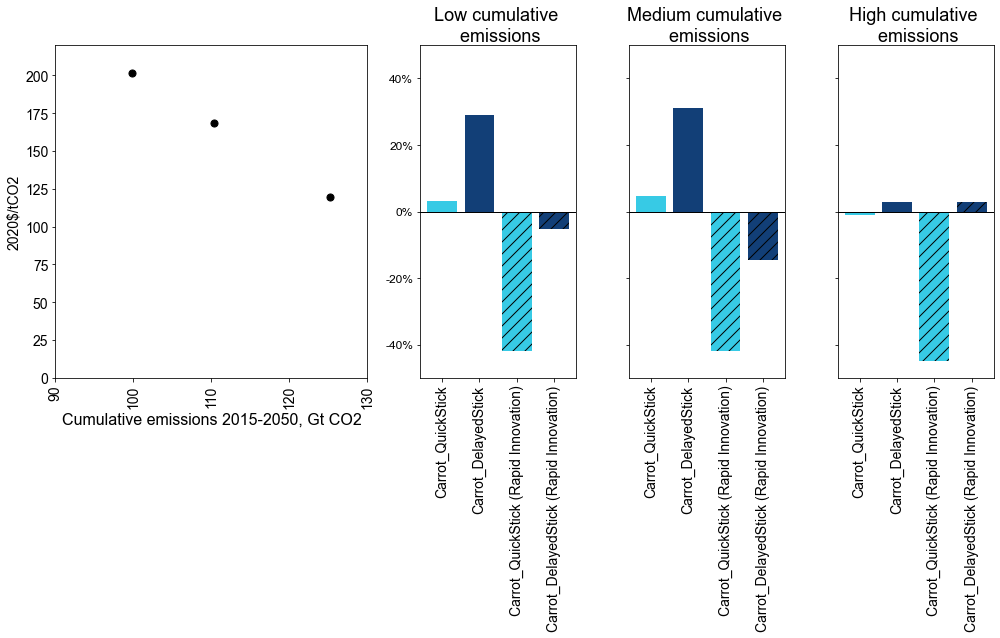

In [13]:
# 4-panel carbon price figure, with cumulative emission as x-axis for the 1st panel
# Added space between the first panel and the rest
# changed colors, don't use red and green

# 设置全局字体为Arial
mpl.rcParams['font.family'] = 'Arial'

#setting color map
color=[ '#37cae5','#123f77', '#37cae5','#123f77']

# 创建一个包含四个子图的1x4图
fig = plt.figure(figsize=(14, 9))

# 使用GridSpec定义子图的布局
gs = GridSpec(1, 4, width_ratios=[2, 1, 1, 1])

# 使用GridSpec定义子图的布局
# gs = GridSpec(1, 4, width_ratios=[3, 1, 1, 1]) 

# data
# x1=[ '100% decarbonization','80% decarbonization','60% decarbonization']
x1=[99.81, 110.33, 125.22]
# x2=['Carrot_EarlyStick','Carrot_LateStick','Carrot_EarlyStick_Innovation','Carrot_LateStick_Innovation']
# x3=['Carrot_EarlyStick_Innovation_nt','Carrot_EarlyStick_Innovation_et','Carrot_LateStick_Innovation_nt','Carrot_LateStick_Innovation_et']

x2=['Carrot_QuickStick','Carrot_DelayedStick','Carrot_QuickStick (Rapid Innovation)','Carrot_DelayedStick (Rapid Innovation)']
x3=['Carrot_QuickStick','Carrot_DelayedStick','Carrot_QuickStick','Carrot_DelayedStick']

y1=[price_s100,price_s80,price_s60]
y2=[price_2030nl100,price_2040nl100,price_2030l100, price_2040l100]
y3=[price_2030nl80,price_2040nl80,price_2030l80, price_2040l80]
y4=[price_2030nl60,price_2040nl60,price_2030l60, price_2040l60]

# 第一个子图，独立的y轴
ax1 = plt.subplot(gs[0])
ax1.scatter(x1, y1, color='black',s=50 )
# ax1.set_title('    Carbon prices, stick-only cases \n in 2050',wrap=True, size=14)
ax1.set_ylim(0, 220)  # 设置y轴范围
ax1.set_xlim(90, 130)
ax1.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax1.tick_params(axis='y', labelsize=14)
plt.xticks(rotation=90) 
plt.xlabel("Cumulative emissions 2015-2050, Gt CO2", wrap=True, size=16)
plt.ylabel("2020$/tCO2", wrap=True, size=14)

# 后三个子图，共享y轴
ax2 = plt.subplot(gs[1])
bars = ax2.bar(x2, y2, color=color)
for j in [-2, -1]:
    bars[j].set_hatch('//')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_title('Low cumulative \n emissions', wrap=True, size=18)
ax2.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax2.tick_params(axis='y', labelsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
ax2.set_ylim(-0.5, 0.5)
plt.xticks(rotation=90)
# axx2.set_ylabel("")

# 使第2和第3个子图之间的间距为0
plt.subplots_adjust(wspace=0, hspace=0)

ax3 = plt.subplot(gs[2])#, sharey=ax2)
bars3 = ax3.bar(x2, y3, color=color)
for j in [-2, -1]:
    bars3[j].set_hatch('//')
ax3.set_yticklabels([])
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.set_title('Medium cumulative \n emissions', wrap=True, size=18)
ax3.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax3.set_ylim(-0.5, 0.5)
plt.xticks(rotation=90)

ax4 = plt.subplot(gs[3] , sharey=ax3)
bars4 = ax4.bar(x2, y4, color=color)
for j in [-2, -1]:
    bars4[j].set_hatch('//')
ax4.set_yticklabels([])
# ax4.yaxis.tick_right()
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_title('High cumulative \n emissions', wrap=True, size=18)
ax4.tick_params(axis='x', labelsize=14)  # 设置x轴刻度字号
ax4.set_ylim(-0.5, 0.5)
plt.xticks(rotation=90)
# ax4.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# 调整标题的位置
fig.tight_layout()

plt.savefig("fig 3_carbon prices_v2.svg", transparent = True)

# 显示图形
plt.show()
